<a href="https://colab.research.google.com/github/kumarsourav3/Covid-19-case-study/blob/main/FinalProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

We have been given information of some patients in two datasets. The first data set(baselines) consist information about the different factors that may lead to causing Covid-19 while the other dataset(lab and vitals) consist values of the vitals of the patient at different instant of time. Though in the second dataset, there were missing values i.e. some vitals values of the patient were missing in the datset. So, we replace the missing value of a vital with the mean of the vital value. Finally for each patient we replace the vital value with the average of the given vital values at different instants of time. 

Combining the baselines and lab and vital dataset into a one dataset named baselines (1) as described below.


A pivot table was made using lab and vital name, subject and values.
Pivot table was filled with avg value of values of each subject corresponding to each lab or vital name. Now extra columns were added to the baseline csv having name of different lab or vital ...and they were filled using pivot table using vlookup function in excel

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Reading the data into pandas dataframe

In [ ]:
patient_data=pd.read_csv('/content/baselines (1).csv')

Getting Some info about the data

In [ ]:
patient_data.head()

,mrn,Age,sex.factor,bmi,hypoxia_ed.factor,smoke_vape,dm.factor,htn.factor,pulm___1.factor,renal___1.factor,renal___2.factor,cad.factor,cancer,any_immunosuppression,symptoms___1.factor,symptoms___2.factor,symptoms___10.factor,symptoms___9.factor,symptoms___8.factor,symptoms___3.factor,first_cxr_results___0.factor,first_cxr_results___1.factor,first_cxr_results___2.factor,first_cxr_results___3.factor,duration_symptoms,Ed_before_order_set,event,s_bp_noninvasive (d),vs_bp_noninvasive (s),vs_hr_hr,xp_resp_rate_pt,xp_resp_spo2
0,655528,62.321679,Male,20.388645,No,No,No,Yes,Unchecked,Unchecked,Unchecked,No,No,unknown/No,Checked,Checked,Unchecked,Unchecked,Unchecked,Checked,Unchecked,Unchecked,Checked,Unchecked,8,No,Yes,61.162459,129.902067,72.801656,30.400445,91.445496
1,729545,78.625586,Female,27.554594,Yes,No,Yes,Yes,Unchecked,Unchecked,Unchecked,No,No,unknown/No,Checked,Checked,Unchecked,Checked,Unchecked,Checked,Unchecked,Unchecked,Checked,Unchecked,20,Yes,Yes,58.777900,128.472046,72.903227,29.859476,92.746338
2,805568,70.460677,Female,34.141729,Yes,No,Yes,Yes,Unchecked,Unchecked,Unchecked,Yes,No,unknown/No,Checked,Checked,Unchecked,Unchecked,Unchecked,Unchecked,Unchecked,Unchecked,Checked,Unchecked,9,No,No,60.488792,129.666909,74.767961,29.835982,91.200127
3,895876,59.043149,Male,19.833296,Yes,Yes,Yes,No,Unchecked,Unchecked,Unchecked,Yes,No,unknown/No,Checked,Unchecked,Unchecked,Unchecked,Unchecked,Unchecked,Unchecked,Checked,Unchecked,Unchecked,7,No,No,59.276564,131.727024,76.640412,30.124052,92.662588
4,905164,90.477229,Male,19.858003,No,No,Yes,Yes,Unchecked,Unchecked,Unchecked,No,No,unknown/No,Unchecked,Checked,Unchecked,Unchecked,Unchecked,Checked,Unchecked,Unchecked,Checked,Unchecked,25,Yes,No,59.334065,129.495319,77.028180,28.720727,91.492369


In [ ]:
patient_data.tail()

,mrn,Age,sex.factor,bmi,hypoxia_ed.factor,smoke_vape,dm.factor,htn.factor,pulm___1.factor,renal___1.factor,renal___2.factor,cad.factor,cancer,any_immunosuppression,symptoms___1.factor,symptoms___2.factor,symptoms___10.factor,symptoms___9.factor,symptoms___8.factor,symptoms___3.factor,first_cxr_results___0.factor,first_cxr_results___1.factor,first_cxr_results___2.factor,first_cxr_results___3.factor,duration_symptoms,Ed_before_order_set,event,s_bp_noninvasive (d),vs_bp_noninvasive (s),vs_hr_hr,xp_resp_rate_pt,xp_resp_spo2
1340,90277384,43.972308,Female,29.990926,No,No,Yes,No,Checked,Unchecked,Unchecked,No,No,unknown/No,Checked,Checked,Unchecked,Unchecked,Checked,Checked,Unchecked,Unchecked,Checked,Unchecked,9,No,Yes,60.377749,129.318512,73.589357,28.912006,93.633057
1341,90277636,31.864515,Male,28.560150,No,Yes,Yes,Yes,Unchecked,Unchecked,Unchecked,No,No,unknown/No,Checked,Unchecked,Unchecked,Unchecked,Unchecked,Unchecked,Unchecked,Unchecked,Unchecked,Unchecked,12,Yes,No,62.284739,129.634777,74.987461,30.351910,92.314679
1342,90277804,20.301802,Male,25.636694,No,Yes,No,No,Unchecked,Unchecked,Unchecked,No,No,unknown/No,Checked,Checked,Checked,Unchecked,Unchecked,Unchecked,Unchecked,Unchecked,Checked,Unchecked,3,No,Yes,60.810227,131.418772,75.715752,28.935384,91.513000
1343,90284224,98.249858,Male,22.520367,No,No,No,Yes,Unchecked,Unchecked,Unchecked,Yes,No,unknown/No,Checked,Unchecked,Checked,Unchecked,Unchecked,Unchecked,Checked,Checked,Checked,Unchecked,6,Yes,No,59.640382,130.406128,75.813503,30.712350,90.838096
1344,90289960,64.086610,Female,28.502931,Yes,Yes,No,Yes,Unchecked,Unchecked,Unchecked,Yes,No,unknown/No,Checked,Unchecked,Checked,Unchecked,Unchecked,Checked,Unchecked,Unchecked,Unchecked,Checked,2,No,Yes,61.267579,130.142080,75.010405,30.456829,89.991002


In [ ]:
patient_data.describe()

,mrn,Age,bmi,duration_symptoms,s_bp_noninvasive (d),vs_bp_noninvasive (s),vs_hr_hr,xp_resp_rate_pt,xp_resp_spo2
count,1.345000e+03,1345.000000,1345.000000,1345.000000,1345.000000,1345.000000,1345.000000,1345.000000,1345.000000
mean,5.518217e+07,65.424301,27.844956,8.896654,59.976878,129.977073,74.976492,29.975937,92.482204
std,3.899901e+07,17.321518,6.513850,5.154361,1.002223,0.986869,0.982808,0.996878,0.980907
min,6.555280e+05,-2.079025,9.861328,1.000000,55.738028,126.266505,70.994344,26.851161,89.154466
25%,6.467320e+06,54.142753,23.596934,5.000000,59.334065,129.343462,74.324431,29.327234,91.834097
50%,7.670870e+07,66.963905,27.237496,9.000000,59.988261,130.018258,74.980167,29.979182,92.499119
75%,9.007959e+07,77.862961,30.961962,11.000000,60.601970,130.626620,75.639710,30.598468,93.163502
max,9.028996e+07,113.674338,58.904689,35.000000,63.266960,132.783231,78.053730,33.784156,95.257558


In [ ]:
patient_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1345 entries, 0 to 1344
Data columns (total 32 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   mrn                           1345 non-null   int64  
 1   Age                           1345 non-null   float64
 2   sex.factor                    1345 non-null   object 
 3   bmi                           1345 non-null   float64
 4   hypoxia_ed.factor             1345 non-null   object 
 5   smoke_vape                    1345 non-null   object 
 6   dm.factor                     1345 non-null   object 
 7   htn.factor                    1345 non-null   object 
 8   pulm___1.factor               1345 non-null   object 
 9   renal___1.factor              1345 non-null   object 
 10  renal___2.factor              1345 non-null   object 
 11  cad.factor                    1345 non-null   object 
 12  cancer                        1345 non-null   object 
 13  any

In [ ]:
patient_data['event'].describe()

count     1345
unique       2
top         No
freq       700
Name: event, dtype: object

**Exploratory Data Analysis**.
First we check out the missing data.
We can use seaborn to create a simple heatmap to see our heating data

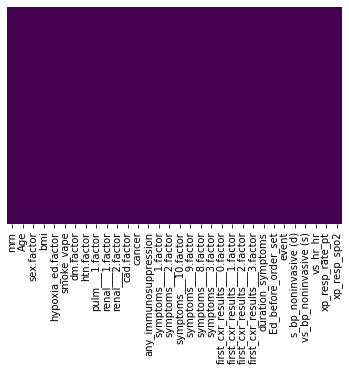

In [ ]:
sns.heatmap(patient_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

No data are missing in this csv file. So we go ahead for further analysis. We continue with visualizing more data.

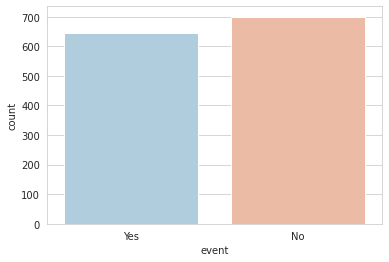

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='event',data=patient_data,palette='RdBu_r')

The above graph shows the counts of the patient who need a ventilation and who donot.

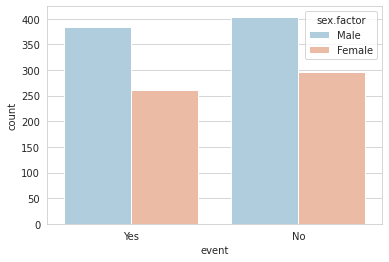

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='event',data=patient_data,hue='sex.factor',palette='RdBu_r')

The following graph shows the distribution of Ages of the patients. The mean age comes out to be 65.

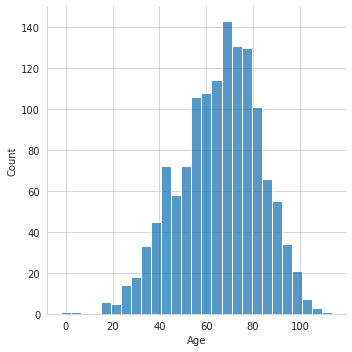

In [ ]:
sns.displot(data=patient_data,x='Age')

The following graph shows various relations between the different features of the data

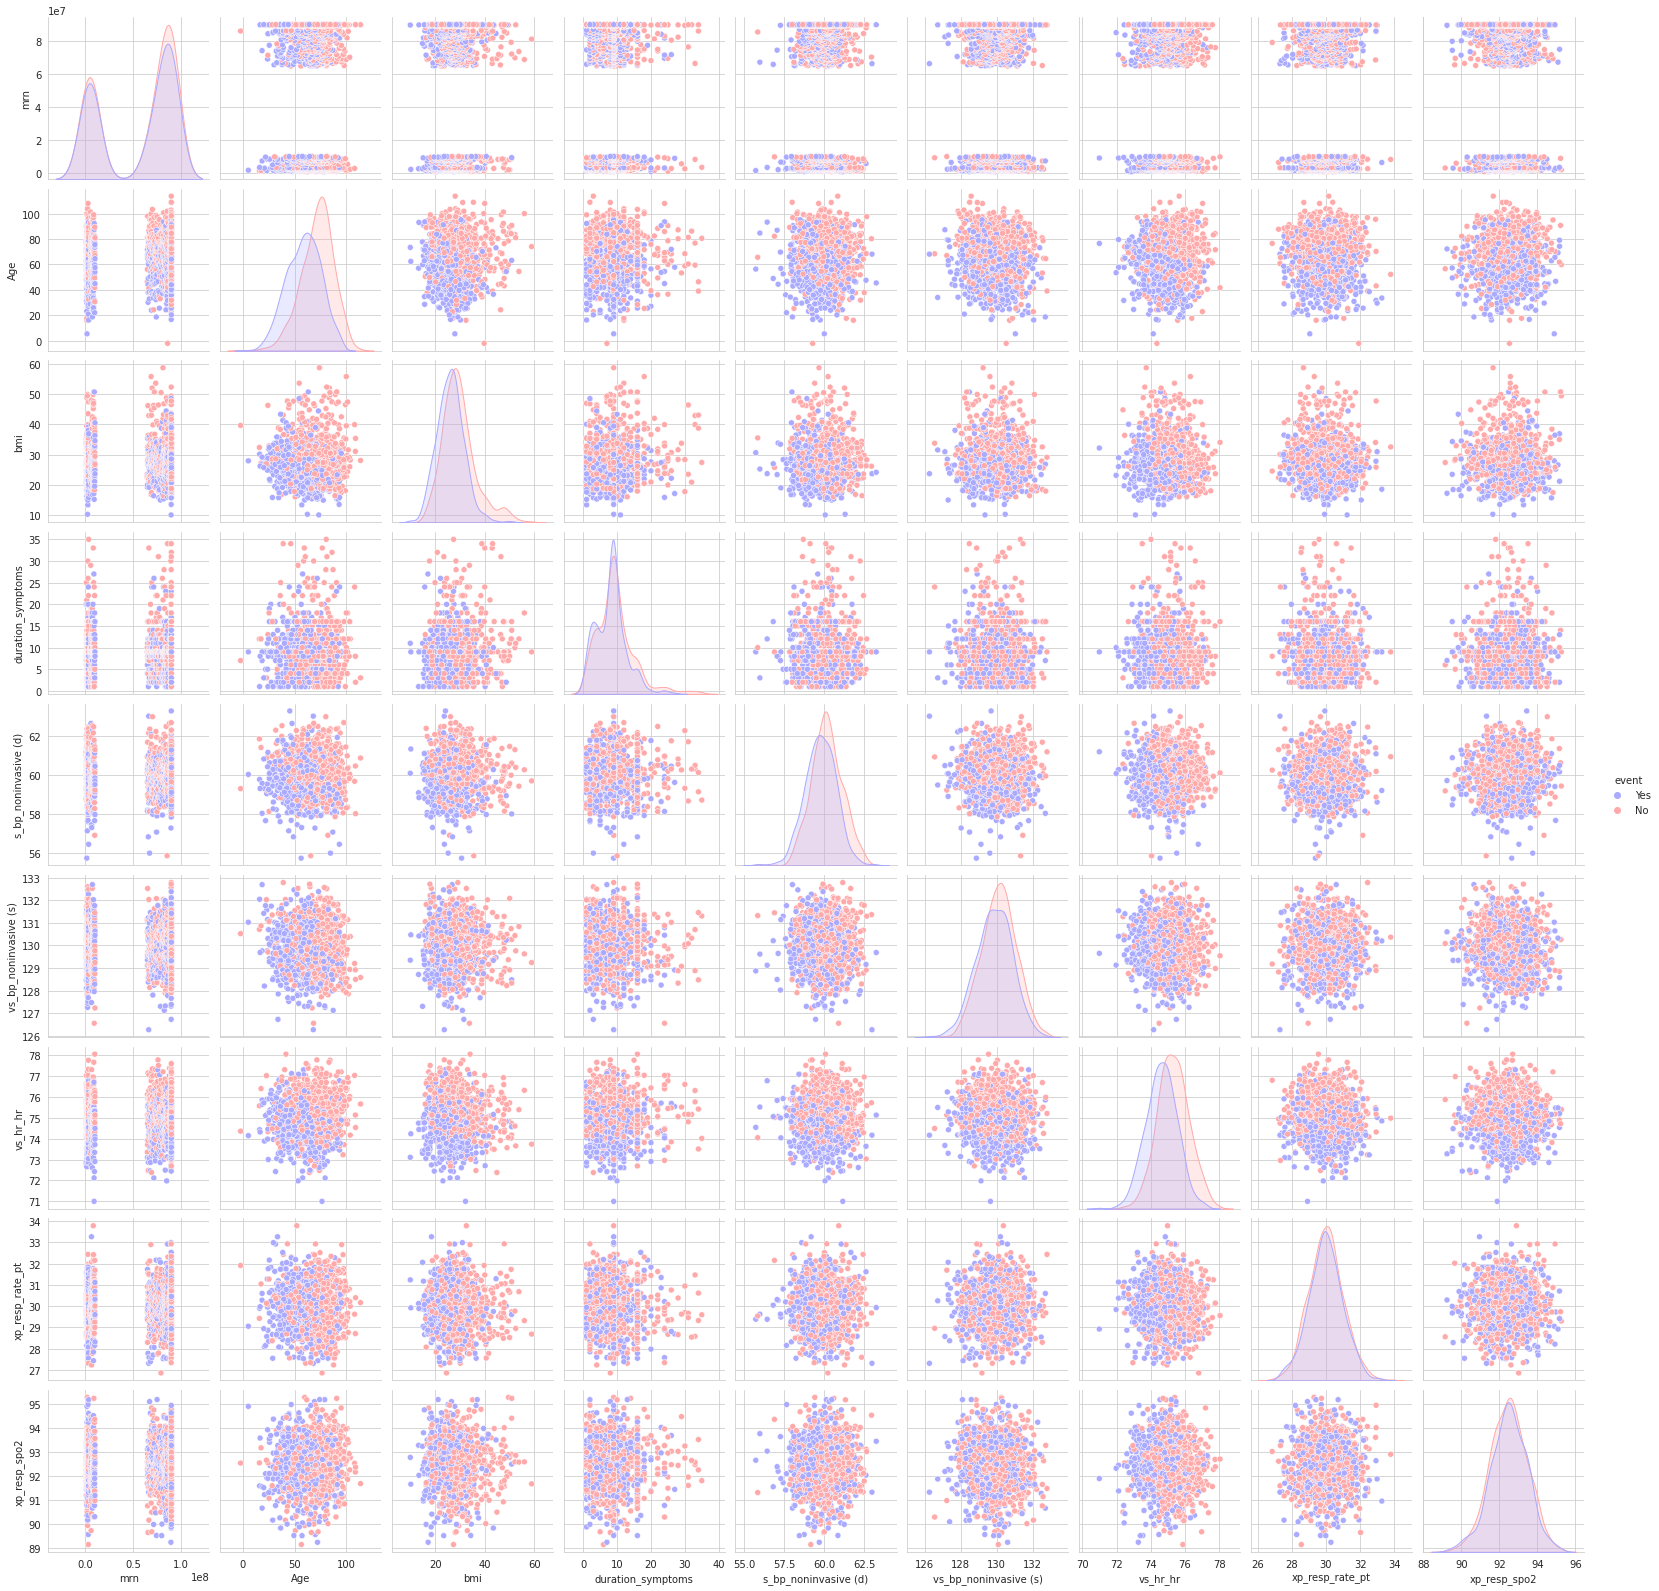

In [ ]:
sns.pairplot(data=patient_data,hue='event',palette='bwr')

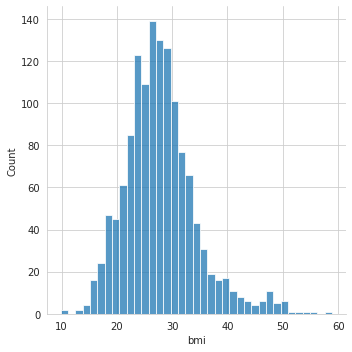

In [ ]:
sns.displot(data=patient_data,x='bmi')

The following graphs show the distribution of vitals. We can calculate mean of the vital values using the mean function for more insights.

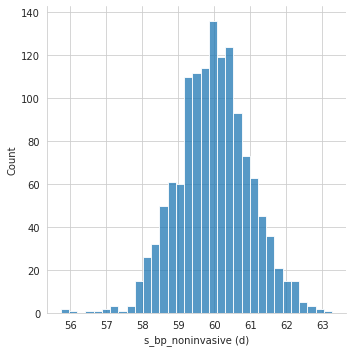

In [ ]:
sns.displot(data=patient_data,x='s_bp_noninvasive (d)')

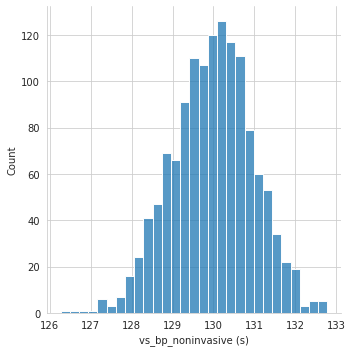

In [ ]:
sns.displot(data=patient_data,x='vs_bp_noninvasive (s)')

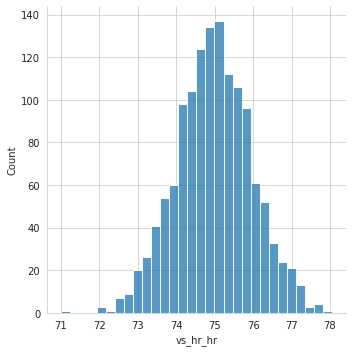

In [ ]:
sns.displot(data=patient_data,x='vs_hr_hr')

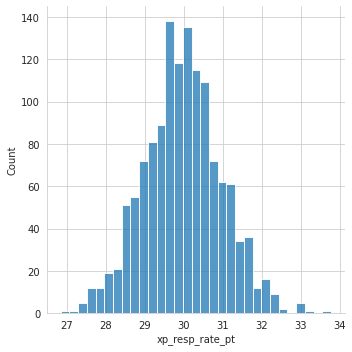

In [ ]:
sns.displot(data=patient_data,x='xp_resp_rate_pt')

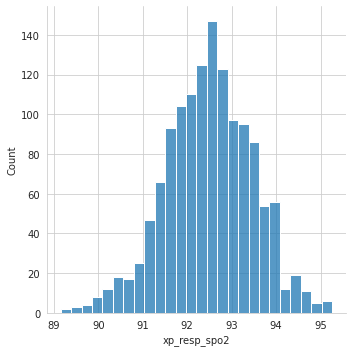

In [ ]:
sns.displot(data=patient_data,x='xp_resp_spo2')

The following graphs give an idea about the number of patients in which the different factors were found

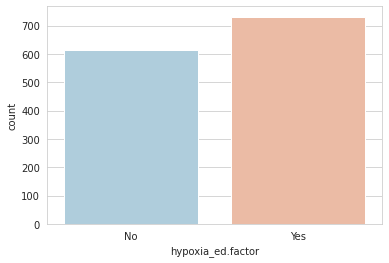

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='hypoxia_ed.factor',data=patient_data,palette='RdBu_r')

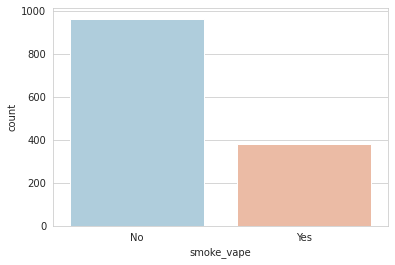

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='smoke_vape',data=patient_data,palette='RdBu_r')

In the following graph, since the number of patients who donot have any immunosuppression is much greater than that those who have. Thus we can ignore this feature while predicting the outcome

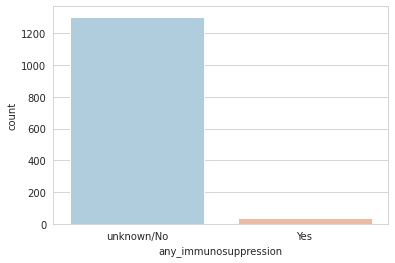

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='any_immunosuppression',data=patient_data,palette='RdBu_r')

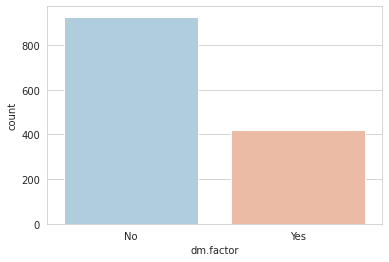

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='dm.factor',data=patient_data,palette='RdBu_r')

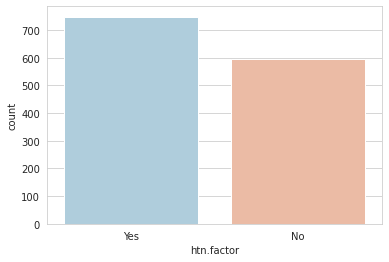

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='htn.factor',data=patient_data,palette='RdBu_r')

In the below graph, most of the patients donot have pulm_1 factor. So we ignore this feature. Same is the case with renal_1, renal_2, cancer, first_cxr_results___0.factor,symptoms___8.factor, factor,symptoms___9.factor, first_cxr_results___1.factor, first_cxr_results___3.factor

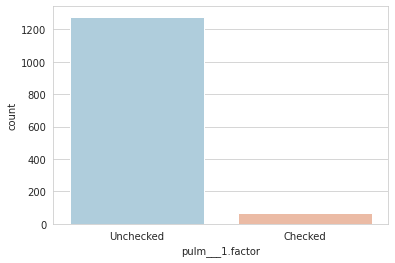

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='pulm___1.factor',data=patient_data,palette='RdBu_r')

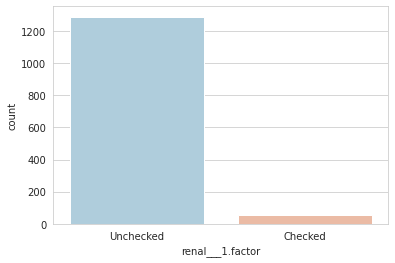

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='renal___1.factor',data=patient_data,palette='RdBu_r')

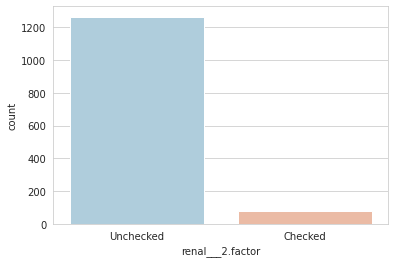

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='renal___2.factor',data=patient_data,palette='RdBu_r')

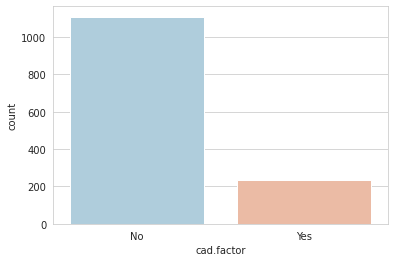

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='cad.factor',data=patient_data,palette='RdBu_r')

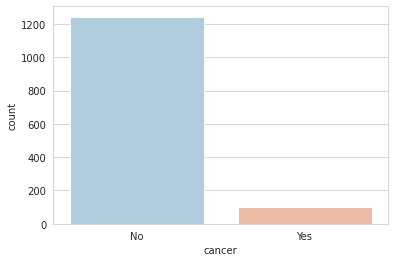

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='cancer',data=patient_data,palette='RdBu_r')

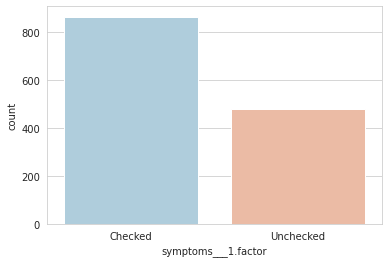

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='symptoms___1.factor',data=patient_data,palette='RdBu_r')

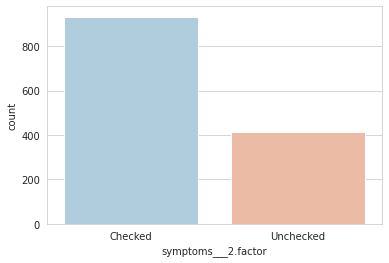

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='symptoms___2.factor',data=patient_data,palette='RdBu_r')

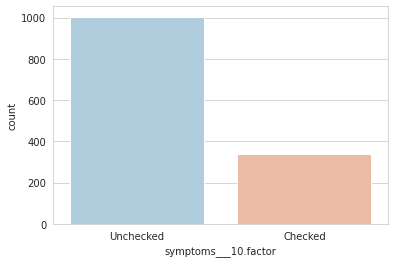

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='symptoms___10.factor',data=patient_data,palette='RdBu_r')

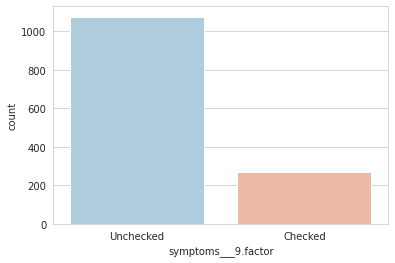

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='symptoms___9.factor',data=patient_data,palette='RdBu_r')

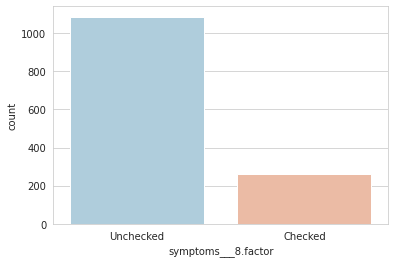

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='symptoms___8.factor',data=patient_data,palette='RdBu_r')

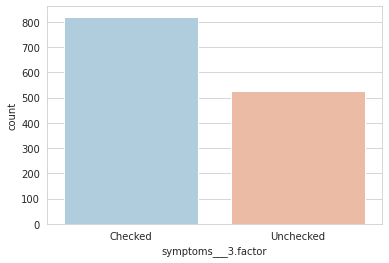

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='symptoms___3.factor',data=patient_data,palette='RdBu_r')

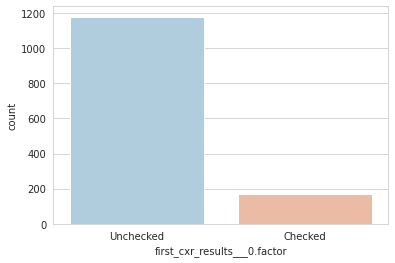

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='first_cxr_results___0.factor',data=patient_data,palette='RdBu_r')

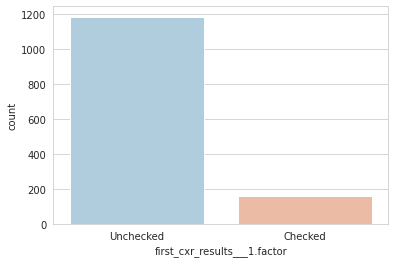

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='first_cxr_results___1.factor',data=patient_data,palette='RdBu_r')

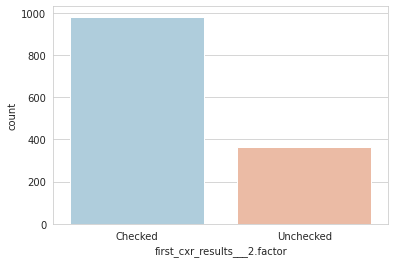

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='first_cxr_results___2.factor',data=patient_data,palette='RdBu_r')

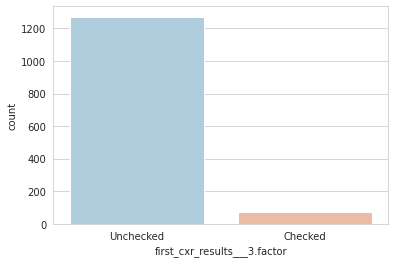

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='first_cxr_results___3.factor',data=patient_data,palette='RdBu_r')

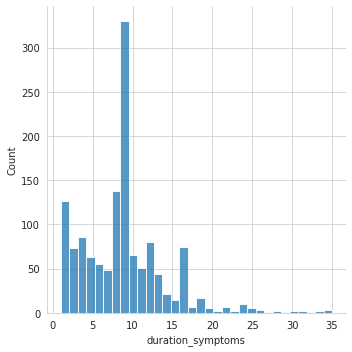

In [ ]:
sns.displot(data=patient_data,x='duration_symptoms')

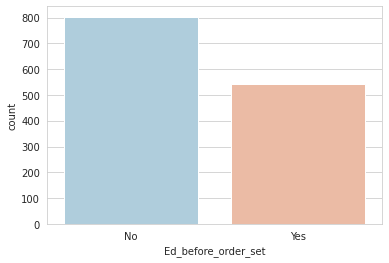

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='Ed_before_order_set',data=patient_data,palette='RdBu_r')

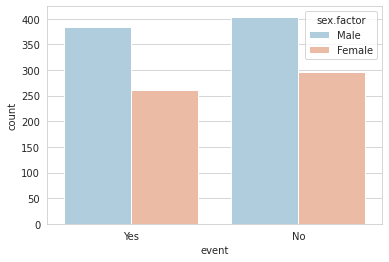

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='event',data=patient_data,hue='sex.factor',palette='RdBu_r')

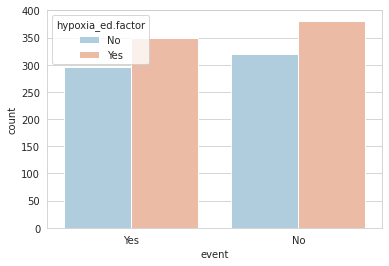

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='event',data=patient_data,hue='hypoxia_ed.factor',palette='RdBu_r')

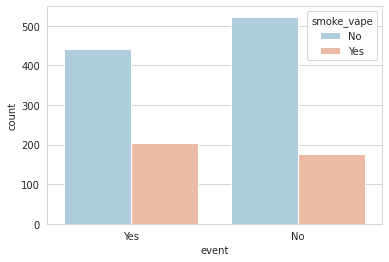

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='event',data=patient_data,hue='smoke_vape',palette='RdBu_r')

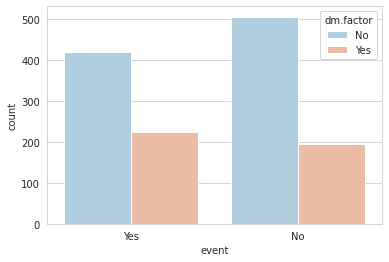

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='event',data=patient_data,hue='dm.factor',palette='RdBu_r')

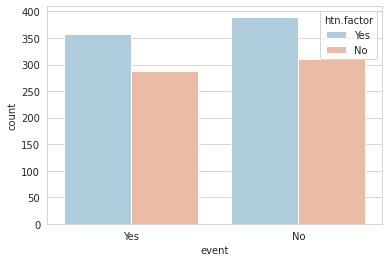

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='event',data=patient_data,hue='htn.factor',palette='RdBu_r')

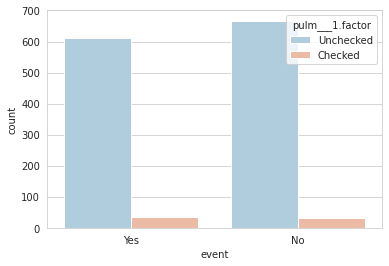

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='event',data=patient_data,hue='pulm___1.factor',palette='RdBu_r')

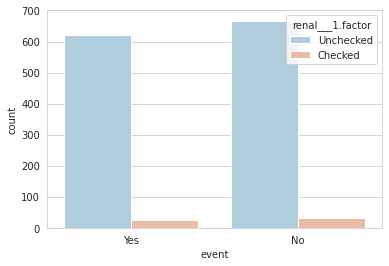

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='event',data=patient_data,hue='renal___1.factor',palette='RdBu_r')

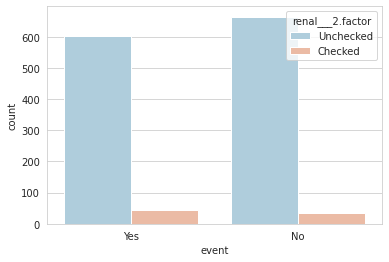

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='event',data=patient_data,hue='renal___2.factor',palette='RdBu_r')

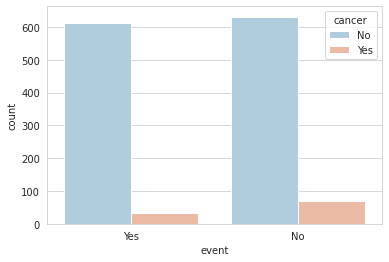

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='event',data=patient_data,hue='cancer',palette='RdBu_r')

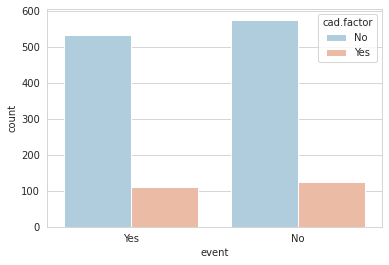

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='event',data=patient_data,hue='cad.factor',palette='RdBu_r')

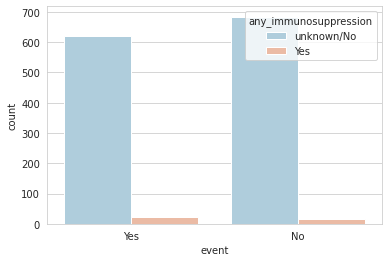

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='event',data=patient_data,hue='any_immunosuppression',palette='RdBu_r')

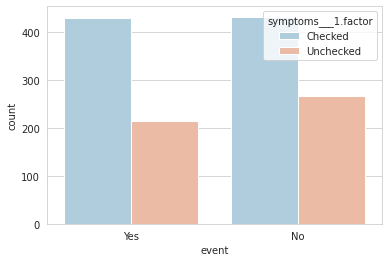

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='event',data=patient_data,hue='symptoms___1.factor',palette='RdBu_r')

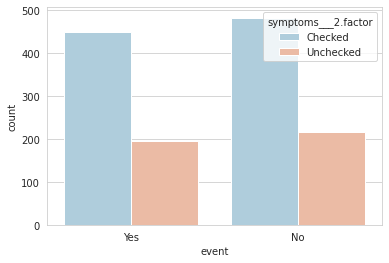

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='event',data=patient_data,hue='symptoms___2.factor',palette='RdBu_r')

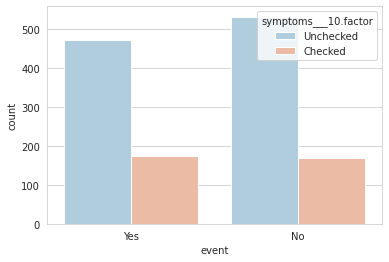

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='event',data=patient_data,hue='symptoms___10.factor',palette='RdBu_r')

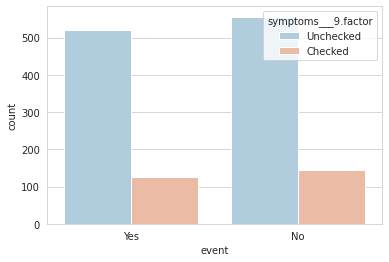

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='event',data=patient_data,hue='symptoms___9.factor',palette='RdBu_r')

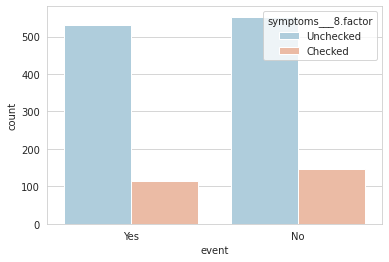

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='event',data=patient_data,hue='symptoms___8.factor',palette='RdBu_r')

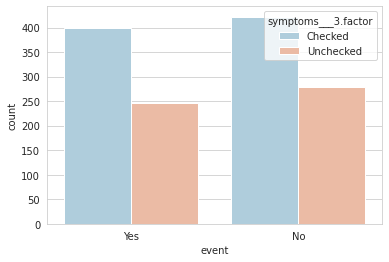

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='event',data=patient_data,hue='symptoms___3.factor',palette='RdBu_r')

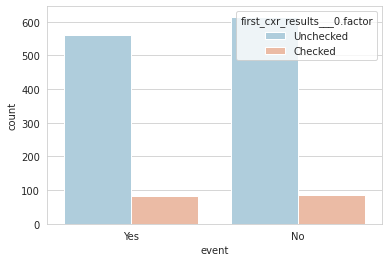

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='event',data=patient_data,hue='first_cxr_results___0.factor',palette='RdBu_r')

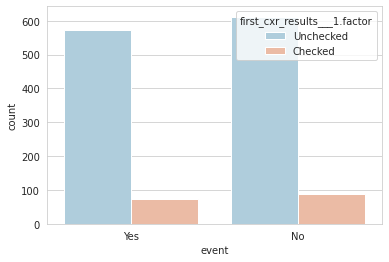

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='event',data=patient_data,hue='first_cxr_results___1.factor',palette='RdBu_r')

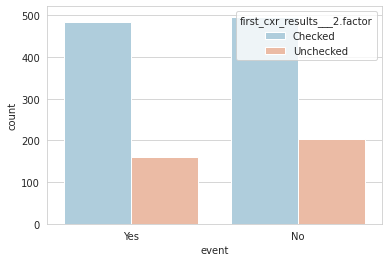

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='event',data=patient_data,hue='first_cxr_results___2.factor',palette='RdBu_r')

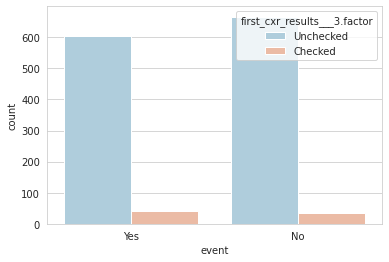

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='event',data=patient_data,hue='first_cxr_results___3.factor',palette='RdBu_r')

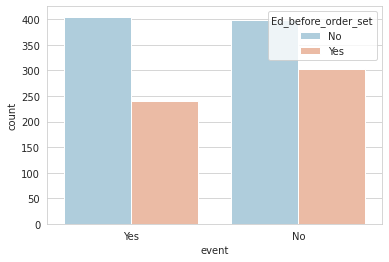

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='event',data=patient_data,hue='Ed_before_order_set',palette='RdBu_r')

Converting cateogorical features to dummy variables so that we can apply machine learning algorithm

In [ ]:
patient_data['event']=(patient_data['event']=='Yes').astype(int)
patient_data['Ed_before_order_set']=(patient_data['Ed_before_order_set']=='Yes').astype(int)
patient_data['cancer']=(patient_data['cancer']=='Yes').astype(int)
patient_data['hypoxia_ed.factor']=(patient_data['hypoxia_ed.factor']=='Yes').astype(int)
patient_data['smoke_vape']=(patient_data['smoke_vape']=='Yes').astype(int)
patient_data['dm.factor']=(patient_data['dm.factor']=='Yes').astype(int)
patient_data['htn.factor']=(patient_data['htn.factor']=='Yes').astype(int)
patient_data['cad.factor']=(patient_data['cad.factor']=='Yes').astype(int)

In [ ]:
def corr(x):
    if x[0]=="U" or x[0]=="u":
        return 0
    if x[0]=="C" or x[0]=='Y':
        return 1

In [ ]:
columns=['pulm___1.factor', 'renal___1.factor',	'renal___2.factor',	'any_immunosuppression'	,'symptoms___1.factor',	'symptoms___2.factor'	,'symptoms___10.factor',	'symptoms___9.factor',	'symptoms___8.factor',	'symptoms___3.factor',	'first_cxr_results___0.factor',	'first_cxr_results___1.factor'	,'first_cxr_results___2.factor',	'first_cxr_results___3.factor']	

In [ ]:
for i in columns:
  patient_data[i]=patient_data[i].apply(lambda x:corr(x))

In [ ]:
patient_data.head()

,mrn,Age,sex.factor,bmi,hypoxia_ed.factor,smoke_vape,dm.factor,htn.factor,pulm___1.factor,renal___1.factor,renal___2.factor,cad.factor,cancer,any_immunosuppression,symptoms___1.factor,symptoms___2.factor,symptoms___10.factor,symptoms___9.factor,symptoms___8.factor,symptoms___3.factor,first_cxr_results___0.factor,first_cxr_results___1.factor,first_cxr_results___2.factor,first_cxr_results___3.factor,duration_symptoms,Ed_before_order_set,event,s_bp_noninvasive (d),vs_bp_noninvasive (s),vs_hr_hr,xp_resp_rate_pt,xp_resp_spo2
0,655528,62.321679,Male,20.388645,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,8,0,1,61.162459,129.902067,72.801656,30.400445,91.445496
1,729545,78.625586,Female,27.554594,1,0,1,1,0,0,0,0,0,0,1,1,0,1,0,1,0,0,1,0,20,1,1,58.777900,128.472046,72.903227,29.859476,92.746338
2,805568,70.460677,Female,34.141729,1,0,1,1,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,9,0,0,60.488792,129.666909,74.767961,29.835982,91.200127
3,895876,59.043149,Male,19.833296,1,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,7,0,0,59.276564,131.727024,76.640412,30.124052,92.662588
4,905164,90.477229,Male,19.858003,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,25,1,0,59.334065,129.495319,77.028180,28.720727,91.492369


In [ ]:
def corr1(y):
    if y[0]=="M":
        return 1
    if y[0]=="F":
        return 0

In [ ]:
patient_data['sex.factor']=patient_data['sex.factor'].apply(lambda y:corr1(y))

In [ ]:
patient_data.head()

,mrn,Age,sex.factor,bmi,hypoxia_ed.factor,smoke_vape,dm.factor,htn.factor,pulm___1.factor,renal___1.factor,renal___2.factor,cad.factor,cancer,any_immunosuppression,symptoms___1.factor,symptoms___2.factor,symptoms___10.factor,symptoms___9.factor,symptoms___8.factor,symptoms___3.factor,first_cxr_results___0.factor,first_cxr_results___1.factor,first_cxr_results___2.factor,first_cxr_results___3.factor,duration_symptoms,Ed_before_order_set,event,s_bp_noninvasive (d),vs_bp_noninvasive (s),vs_hr_hr,xp_resp_rate_pt,xp_resp_spo2
0,655528,62.321679,1,20.388645,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,8,0,1,61.162459,129.902067,72.801656,30.400445,91.445496
1,729545,78.625586,0,27.554594,1,0,1,1,0,0,0,0,0,0,1,1,0,1,0,1,0,0,1,0,20,1,1,58.777900,128.472046,72.903227,29.859476,92.746338
2,805568,70.460677,0,34.141729,1,0,1,1,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,9,0,0,60.488792,129.666909,74.767961,29.835982,91.200127
3,895876,59.043149,1,19.833296,1,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,7,0,0,59.276564,131.727024,76.640412,30.124052,92.662588
4,905164,90.477229,1,19.858003,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,25,1,0,59.334065,129.495319,77.028180,28.720727,91.492369


Building a Logistic Regression Model

We start by selecting the features which important for predicting the outcome

In [ ]:
from sklearn.model_selection import train_test_split
X = patient_data[['Age','sex.factor','bmi','hypoxia_ed.factor','smoke_vape','dm.factor','htn.factor','cad.factor','symptoms___1.factor','symptoms___2.factor','symptoms___3.factor','first_cxr_results___2.factor','duration_symptoms','Ed_before_order_set','s_bp_noninvasive (d)','vs_bp_noninvasive (s)','vs_hr_hr','xp_resp_rate_pt','xp_resp_spo2']]
y = patient_data['event']

Then, We spit our data into a training and test set

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

Normalizing the train and test set data so that all values are in [0,1]


In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
min_max=MinMaxScaler()

In [ ]:
 X_train_minmax=min_max.fit_transform(X_train[['Age','sex.factor','bmi','hypoxia_ed.factor','smoke_vape','dm.factor','htn.factor','cad.factor','symptoms___1.factor','symptoms___2.factor','symptoms___3.factor','first_cxr_results___2.factor','duration_symptoms','Ed_before_order_set','s_bp_noninvasive (d)','vs_bp_noninvasive (s)','vs_hr_hr','xp_resp_rate_pt','xp_resp_spo2']])
 X_test_minmax=min_max.fit_transform(X_test[['Age','sex.factor','bmi','hypoxia_ed.factor','smoke_vape','dm.factor','htn.factor','cad.factor','symptoms___1.factor','symptoms___2.factor','symptoms___3.factor','first_cxr_results___2.factor','duration_symptoms','Ed_before_order_set','s_bp_noninvasive (d)','vs_bp_noninvasive (s)','vs_hr_hr','xp_resp_rate_pt','xp_resp_spo2']])


Training and Predicting

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logmodel = LogisticRegression()
logmodel.fit(X_train_minmax,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
predictions = logmodel.predict(X_test_minmax)

Evaluation

We can check precision,recall, f1-score using classification report.

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.73      0.94      0.82       233
           1       0.91      0.61      0.73       211

    accuracy                           0.79       444
   macro avg       0.82      0.78      0.78       444
weighted avg       0.81      0.79      0.78       444



Conclusion- The overall accuracy comes out to be 79%. However, it can be improved with hypermater tuning or using layered-neural network. 